In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier



colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']



In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.isnull().any()

,0
N,False
P,False
K,False
temperature,False
humidity,False
ph,False
rainfall,False
label,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
print("Number of various crops: ", len(df['label'].unique()))
print("List of crops: ", df['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


Nitrogen analysis

In [ ]:
crop_summary_N = summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Phosphorus Analysis

In [ ]:
crop_summary_P = summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Potassium analysis

In [ ]:
crop_summary_K = summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

N, P, K values comparision between crops

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([
    go.Bar(x=summary.index, y=summary['N'], name='Nitrogen', marker_color='#1f77b4'),
    go.Bar(x=summary.index, y=summary['P'], name='Phosphorous', marker_color='#ff7f0e'),
    go.Bar(x=summary.index, y=summary['K'], name='Potassium', marker_color='#2ca02c')
])

fig.update_layout(
    title="N, P, K Values Comparison Between Crops",
    plot_bgcolor='white',
    barmode='group',  # keep default grouped style
    font=dict(family="Times New Roman", size=14, color="black")
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.bar(summary, x=summary.index, y=["rainfall", "temperature", "humidity"])

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=14,
        color="black"
    )
)

fig.show()


In [ ]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [ ]:
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

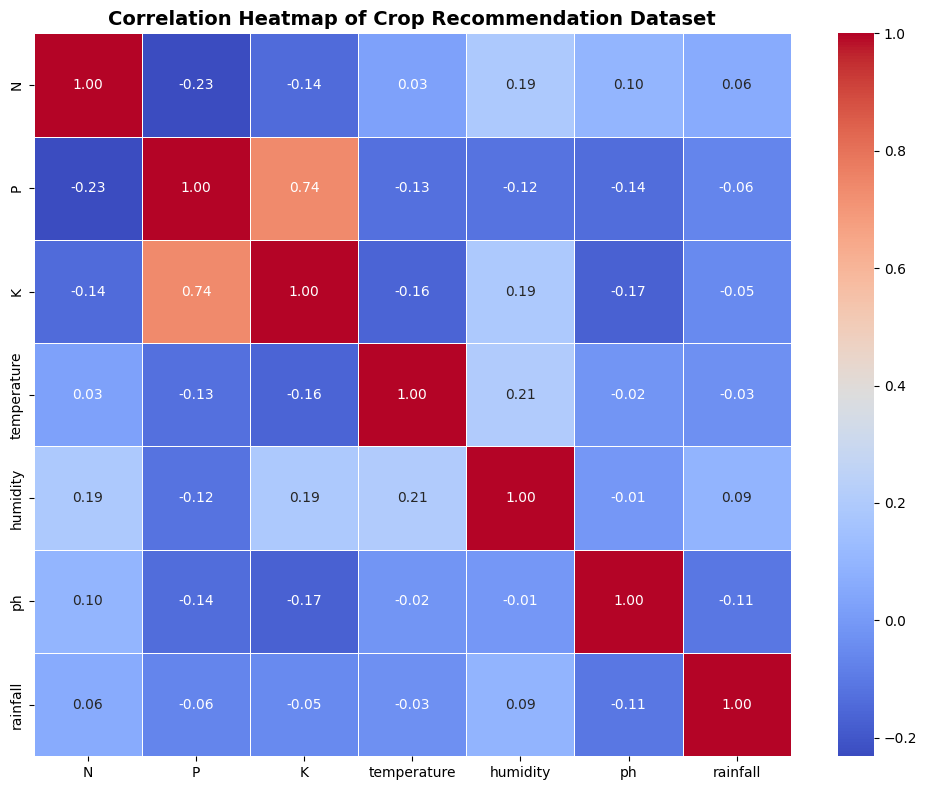

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Force Times New Roman font
plt.rcParams["font.family"] = "Times New Roman"

correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Crop Recommendation Dataset", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=0),
    "Extra Trees": ExtraTreesClassifier(n_estimators=350, random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(verbosity=0),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=0)
}



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model_scores = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    model_scores.append({
        'Model': name,
        'Accuracy (%)': round(accuracy * 100, 4),
        'Precision (%)': round(precision * 100, 4),
        'Recall (%)': round(recall * 100, 4),
        'F1-Score (%)': round(f1 * 100, 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(model_scores).sort_values(by='Accuracy (%)', ascending=False)

# Display the results



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

In [ ]:
results_df

,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
5,Extra Trees,99.6970,99.6970,99.6970,99.6970
4,Random Forest,99.5455,99.5509,99.5455,99.5456
3,Naive Bayes,99.3939,99.4128,99.3939,99.3950
10,CatBoost,99.3939,99.4068,99.3939,99.3918
8,XGBoost,99.0909,99.1215,99.0909,99.0840
9,LightGBM,98.9394,98.9616,98.9394,98.9366
7,Gradient Boosting,98.6364,98.6982,98.6364,98.6441
1,SVM,98.3333,98.5048,98.3333,98.3488
6,Decision Tree,98.0303,98.0998,98.0303,97.9884
2,K-Nearest Neighbors,97.5758,97.8463,97.5758,97.5961


In [ ]:
from sklearn.metrics import accuracy_score

# Store results
test_accuracies = {}

# Loop through each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    test_accuracies[name] = acc
    print(f"{name} Test Accuracy: {acc:.2f}%\n")

# Optional: display as DataFrame
import pandas as pd

accuracy_df = pd.DataFrame(list(test_accuracies.items()), columns=['Model', 'Test Accuracy (%)'])
accuracy_df = accuracy_df.sort_values(by='Test Accuracy (%)', ascending=False).reset_index(drop=True)

print("\n🔍 Sorted Test Accuracies:\n")
print(accuracy_df)


Training Logistic Regression...
Logistic Regression Test Accuracy: 96.06%

Training SVM...
SVM Test Accuracy: 98.33%

Training K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 97.58%

Training Naive Bayes...
Naive Bayes Test Accuracy: 99.39%

Training Random Forest...
Random Forest Test Accuracy: 99.55%

Training Extra Trees...
Extra Trees Test Accuracy: 99.70%

Training Decision Tree...
Decision Tree Test Accuracy: 98.03%

Training Gradient Boosting...
Gradient Boosting Test Accuracy: 98.48%

Training XGBoost...
XGBoost Test Accuracy: 99.09%

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start t

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0),
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("Improved Accuracy:", accuracy_score(y_test, y_pred) * 100)


In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)*100
    results.append((name, acc))

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)

In [ ]:
results_df

In [ ]:
import matplotlib.pyplot as plt

# Set default font to Times New Roman for all text
plt.rcParams["font.family"] = "Times New Roman"

# Model names and accuracy (sorted already in your data)
models = [
    "Extra Trees", "Random Forest", "Naive Bayes", "CatBoost",
    "XGBoost", "LightGBM", "Gradient Boosting", "SVM",
    "Decision Tree", "K-Nearest Neighbors", "Logistic Regression"
]

accuracy = [
    99.72, 99.5455, 99.3939, 99.3939,
    99.0909, 98.9394, 98.7879, 98.3333,
    98.0303, 97.5758, 96.0606
]

plt.figure(figsize=(14, 7))
bars = plt.barh(models, accuracy, color='skyblue', edgecolor='black')

# Add accuracy labels
for bar, acc in zip(bars, accuracy):
    plt.text(
        bar.get_width() + 0.02,
        bar.get_y() + bar.get_height() / 2,
        f"{acc:.2f}%",
        va='center',
        ha='left',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel("Accuracy (%)", fontsize=12, weight='bold')
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlim(95, 100)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Train the model
et_model = ExtraTreesClassifier(n_estimators=350, random_state=0)
et_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = et_model.predict(X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy (Extra Trees): {test_accuracy:.2f}%")


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


et_model = ExtraTreesClassifier(n_estimators=350, random_state=0)
et_model.fit(X_train_scaled, y_train)
y_pred_et = et_model.predict(X_test_scaled)


conf_matrix_et = confusion_matrix(y_test, y_pred_et)
class_report_et = classification_report(y_test, y_pred_et, target_names=le.classes_)


plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Optional: Print classification report
print("Classification Report - Extra Trees Classifier:\n")
print(class_report_et)



In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Initialize Extra Trees model
et_model_cv = ExtraTreesClassifier(n_estimators=350, random_state=0)

# Perform 5-fold cross-validation
cv_scores_et = cross_val_score(et_model_cv, X_scaled, y, cv=5)

# Create DataFrame for results
folds = [f"Fold {i+1}" for i in range(5)]
cv_df_et = pd.DataFrame({"Fold": folds, "Accuracy": cv_scores_et})

# Display results
print("Cross-Validation Accuracies (Extra Trees Classifier):")
print(cv_df_et)
print(f"\nMean Accuracy: {np.mean(cv_scores_et):.4f}")
print(f"Standard Deviation: {np.std(cv_scores_et):.4f}")


K-fold validation for random forrest

In [ ]:

plt.figure(figsize=(10, 6))
plt.step(range(1, 6), cv_scores_et, where='mid', marker='o', linewidth=2)
plt.fill_between(range(1, 6), cv_scores_et, step='mid', alpha=0.2)

plt.title("5-Fold Cross-Validation Accuracy - Extra Trees Classifier ")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.xticks(range(1, 6), [f"Fold {i}" for i in range(1, 6)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
!pip install lime


In [ ]:
import lime
import lime.lime_tabular


In [ ]:
from sklearn.ensemble import RandomForestClassifier

et_model = ExtraTreesClassifier(n_estimators=350, random_state=0)
et_model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define models dictionary correctly
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=0),
    "Extra Trees": ExtraTreesClassifier(n_estimators=350, random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(verbosity=0),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}
# Collect feature importances
feature_names = df.drop(columns=['label', 'label_encoded']).columns.tolist()
importances = {}

for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        if hasattr(model, 'feature_importances_'):
            importances[name] = model.feature_importances_
    except:
        pass  # silently skip models that don't support feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame(importances, index=feature_names)

# Plot
plt.figure(figsize=(12, 6))
for feature in importance_df.index:
    plt.plot(importance_df.columns, importance_df.loc[feature], marker='o', label=feature)

plt.title("Feature Importance Comparison Across Models")
plt.xlabel("Models")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
feature_names = X.columns.tolist()

In [ ]:
# This ensures the output always has shape (n_samples, n_classes)
def make_prob_wrapper(model, n_classes):
    def predict_proba_fixed(X):
        proba = model.predict_proba(X)
        # Some classifiers may only output used classes, we fix that
        if proba.shape[1] != n_classes:
            fixed_proba = np.zeros((X.shape[0], n_classes))
            class_indices = model.classes_
            for idx, cls in enumerate(class_indices):
                fixed_proba[:, cls] = proba[:, idx]
            return fixed_proba
        return proba
    return predict_proba_fixed


In [ ]:
feature_names = X.columns.tolist()
class_names = le.classes_
n_classes = len(class_names)

In [ ]:
!pip install lime
!pip install shap


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)


In [ ]:
lime_results = pd.DataFrame(index=feature_names)
test_instance = X_test_scaled[0].reshape(1, -1)

for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        wrapped_proba = make_prob_wrapper(model, n_classes)

        exp = explainer.explain_instance(
            data_row=test_instance.flatten(),
            predict_fn=wrapped_proba,
            num_features=len(feature_names)
        )

        # Parse LIME output
        exp_dict = dict(exp.as_list())
        clean_keys = [k.split(' ')[0] for k in exp_dict.keys()]
        cleaned_exp_dict = dict(zip(clean_keys, exp_dict.values()))

        lime_results[name] = [cleaned_exp_dict.get(f, 0) for f in feature_names]

    except Exception as e:
        print(f"⚠️ {name} failed: {e}")


In [ ]:
import matplotlib.pyplot as plt


lime_results_transposed = lime_results.T

# Create the bar plot with unique colors for each model
ax = lime_results_transposed.plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8,
    color=plt.cm.tab10.colors[:len(lime_results_transposed.columns)]  # Unique colors
)

plt.title("LIME Explanations Comparison")
plt.ylabel("LIME Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Center horizontal line at 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Uncertainity quantification

In [ ]:
# === 1) UNCERTAINTY QUANTIFICATION: Inductive Conformal Prediction (set-valued crops) ===
# Produces: coverage/threshold/set-size table + 2 quick diagrams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Re-split your existing train into (train, calib) for conformal
X_tr, X_cal, y_tr, y_cal = train_test_split(
    X_train_scaled, y_train, test_size=0.25, random_state=42, stratify=y_train
)

base = ExtraTreesClassifier(n_estimators=350, random_state=0)
base.fit(X_tr, y_tr)

probs_cal = base.predict_proba(X_cal)
probs_test = base.predict_proba(X_test_scaled)
y_pred_test = base.predict(X_test_scaled)
top1_acc = accuracy_score(y_test, y_pred_test)

def qhat_for_alpha(probs_calib: np.ndarray, y_calib: np.ndarray, alpha: float) -> float:
    # Nonconformity score s(x,y) = 1 - p_y(x); Vovk correction uses the 'higher' quantile
    scores = 1 - probs_calib[np.arange(len(y_calib)), y_calib]
    n = len(scores)
    return float(np.quantile(scores, np.ceil((n + 1) * (1 - alpha)) / n, method='higher'))

def conformal_sets_from_proba(probs: np.ndarray, qhat: float):
    thr = 1 - qhat
    sets = [np.where(p >= thr)[0] for p in probs]
    return sets, thr

alphas = [0.10, 0.05, 0.01]  # target error => 90%, 95%, 99% coverage
rows = []
all_sets = {}

for a in alphas:
    q = qhat_for_alpha(probs_cal, y_cal, a)
    sets, thr = conformal_sets_from_proba(probs_test, q)
    cov = np.mean([y_test[i] in s for i, s in enumerate(sets)])
    avg_sz = float(np.mean([len(s) for s in sets]))
    med_sz = int(np.median([len(s) for s in sets]))
    top3 = np.mean([y_test[i] in np.argsort(-probs_test[i])[:3] for i in range(len(y_test))])

    rows.append({
        "alpha (err target)": a,
        "coverage achieved": round(cov, 4),
        "prob threshold": round(thr, 4),
        "avg set size": round(avg_sz, 2),
        "median set size": med_sz,
        "top-1 acc": round(top1_acc, 4),
        "top-3 acc": round(top3, 4),
    })
    all_sets[a] = sets

conformal_summary = pd.DataFrame(rows)
print("\n=== Conformal Prediction Summary ===")
print(conformal_summary)

# Quick diagrams
plt.figure()
plt.plot(conformal_summary["alpha (err target)"], conformal_summary["coverage achieved"], marker='o')
plt.title("Coverage vs Target Error (alpha)")
plt.xlabel("alpha (lower alpha = higher target coverage)")
plt.ylabel("Achieved coverage on test")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure()
plt.plot(conformal_summary["alpha (err target)"], conformal_summary["avg set size"], marker='o')
plt.title("Average Prediction-Set Size vs alpha")
plt.xlabel("alpha (lower alpha = larger sets)")
plt.ylabel("Average set size")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Risk control

In [ ]:
# === 2) RISK CONTROL: choose alpha to satisfy a policy (e.g., max average set size) ===

def choose_alpha_by_setsize(probs_calib, y_calib, probs_eval, max_avg_set_size=2.0,
                            candidate_alphas=(0.20, 0.15, 0.10, 0.08, 0.05, 0.03, 0.01)):
    best_alpha = None
    best_row = None
    rows = []
    for a in candidate_alphas:
        q = qhat_for_alpha(probs_calib, y_calib, a)
        sets, thr = conformal_sets_from_proba(probs_eval, q)
        cov = np.mean([y_test[i] in s for i, s in enumerate(sets)])
        avg_sz = float(np.mean([len(s) for s in sets]))
        rows.append((a, cov, thr, avg_sz))
    table = pd.DataFrame(rows, columns=["alpha", "coverage", "threshold", "avg_set_size"])

    # Feasible alphas that meet the set-size constraint
    feasible = table[table["avg_set_size"] <= max_avg_set_size]
    if len(feasible):
        # Among feasible, pick the one with largest coverage (i.e., smallest alpha typically)
        best_row = feasible.sort_values(["coverage", "alpha"], ascending=[False, True]).iloc[0]
        best_alpha = float(best_row["alpha"])
    return best_alpha, table

best_alpha, alpha_table = choose_alpha_by_setsize(probs_cal, y_cal, probs_test, max_avg_set_size=2.0)
print("\n=== Alpha Selection (risk control by set size ≤ 2) ===")
print(alpha_table)
print(f"\nChosen alpha = {best_alpha} (if None, relax constraint or allow larger set size)")


In [ ]:
# === 3) CALIBRATION: Sigmoid & Isotonic; Reliability diagram & ECE ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

# Fit an uncalibrated model on the full training split (you can also refit on X_train_scaled)
uncal = ExtraTreesClassifier(n_estimators=350, random_state=0)
uncal.fit(X_train_scaled, y_train)
probs_uncal = uncal.predict_proba(X_test_scaled)

# Sigmoid (Platt) calibration using 3-fold on training data
sig_cal = CalibratedClassifierCV(uncal, method='sigmoid', cv=3)
sig_cal.fit(X_train_scaled, y_train)
probs_sig = sig_cal.predict_proba(X_test_scaled)

# Isotonic calibration
iso_cal = CalibratedClassifierCV(uncal, method='isotonic', cv=3)
iso_cal.fit(X_train_scaled, y_train)
probs_iso = iso_cal.predict_proba(X_test_scaled)

# Reliability diagram helper
def reliability_curve(probs, y_true, bins=10):
    maxp = probs.max(axis=1)
    preds = probs.argmax(axis=1)
    correct = (preds == y_true).astype(int)

    edges = np.linspace(0, 1, bins + 1)
    idx = np.digitize(maxp, edges) - 1

    confs, accs, counts = [], [], []
    for b in range(bins):
        m = idx == b
        if np.any(m):
            confs.append(maxp[m].mean())
            accs.append(correct[m].mean())
            counts.append(m.sum())
        else:
            confs.append(np.nan); accs.append(np.nan); counts.append(0)
    return np.array(confs), np.array(accs), np.array(counts)

def expected_calibration_error(probs, y_true, bins=10):
    confs, accs, counts = reliability_curve(probs, y_true, bins=bins)
    w = counts / np.sum(counts)
    # ignore NaNs
    mask = ~np.isnan(confs) & ~np.isnan(accs)
    return float(np.nansum(w[mask] * np.abs(accs[mask] - confs[mask])))

ece_uncal = expected_calibration_error(probs_uncal, y_test, bins=10)
ece_sig   = expected_calibration_error(probs_sig, y_test, bins=10)
ece_iso   = expected_calibration_error(probs_iso, y_test, bins=10)
print(f"\nECE — uncalibrated: {ece_uncal:.4f}, sigmoid: {ece_sig:.4f}, isotonic: {ece_iso:.4f}")

# Plot reliability curves
plt.figure()
for name, probs in [("Uncalibrated", probs_uncal), ("Sigmoid", probs_sig), ("Isotonic", probs_iso)]:
    confs, accs, _ = reliability_curve(probs, y_test, bins=10)
    plt.plot(confs, accs, marker='o', label=f"{name}")
plt.plot([0,1],[0,1], linestyle='--', label='Perfect')
plt.title("Reliability Diagram (max-prob bins)")
plt.xlabel("Mean predicted confidence")
plt.ylabel("Empirical accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# === 4) ACTIONABLE COUNTERFACTUALS: minimal N/P/K changes that raise a chosen crop's probability ===
# Simple, fast local search around one test point; keeps weather features fixed.

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# We'll use a calibrated (or uncalibrated) model — pick one:
model_for_cf = uncal  # or sig_cal / iso_cal

# (A) choose an interesting test index
idx0 = 0
y_pred_test = model_for_cf.predict(X_test_scaled)
for i in range(len(X_test_scaled)):
    if y_pred_test[i] != y_test[i]:
        idx0 = i
        break

true_y = int(y_test[idx0])
true_label = le.inverse_transform([true_y])[0]

x0 = X_test_scaled[idx0].copy()
p0_true = model_for_cf.predict_proba([x0])[0][true_y]
pred_label_before = le.inverse_transform([y_pred_test[idx0]])[0]

# (B) define target: "true" means push towards the true class; or put a specific crop name
target_crop = "true"  # e.g., "rice" / "maize" / or keep "true"
if target_crop == "true":
    target_y = true_y
else:
    if target_crop not in le.classes_:
        raise ValueError(f"Unknown crop name: {target_crop}")
    target_y = int(np.where(le.classes_ == target_crop)[0][0])

# (C) local grid search on (ΔN,ΔP,ΔK) **in scaled space**; keep other features fixed
grid = np.linspace(-0.3, 0.3, 7)  # smaller = faster; larger = stronger search
best_delta = np.zeros(3)
best_score = p0_true

for dN in grid:
    for dP in grid:
        for dK in grid:
            x = x0.copy()
            x[:3] = x0[:3] + np.array([dN, dP, dK])
            p_target = model_for_cf.predict_proba([x])[0][target_y]
            # objective: raise target probability; tiny L2 penalty encourages smaller moves
            val = p_target - 0.01*np.linalg.norm([dN,dP,dK])
            if val > (best_score - 0.01*np.linalg.norm(best_delta)):  # same penalty applied
                best_score = p_target
                best_delta = np.array([dN, dP, dK])

# (D) convert Δ from scaled → original units for N,P,K to make it actionable
stds = np.sqrt(scaler.var_)
delta_unscaled = best_delta * stds[:3]

# (E) apply & report new prediction
x_new = x0.copy()
x_new[:3] = x0[:3] + best_delta
pred_after = model_for_cf.predict([x_new])[0]
pred_label_after = le.inverse_transform([pred_after])[0]
p_target_after = model_for_cf.predict_proba([x_new])[0][target_y]

cf_table = pd.DataFrame({
    "feature": ["N","P","K"],
    "Δ (approx original units)": np.round(delta_unscaled, 2)
})
meta = pd.DataFrame({
    "test_index":[int(idx0)],
    "target_crop":[le.inverse_transform([target_y])[0]],
    "true_label":[true_label],
    "pred_before":[pred_label_before],
    "pred_after":[pred_label_after],
    "target_prob_before":[round(float(p0_true),4)],
    "target_prob_after":[round(float(p_target_after),4)]
})

print("\n=== Counterfactual NPK Nudge — Suggested Changes ===")
print(cf_table)
print("\n=== Counterfactual NPK Nudge — Meta ===")
print(meta)
